# 0. 기본라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import datetime
from catboost import CatBoostRegressor
from tqdm import tqdm_notebook

# 1. 데이터 로드

In [2]:
data = pd.read_csv("../data/hepatitisA_data.csv")

FileNotFoundError: [Errno 2] File b'../data/hepatitisA_data.csv' does not exist: b'../data/hepatitisA_data.csv'

# 2. LSTM 방식의 데이터 처리 & 머신러닝 알고리즘

In [3]:
"""예측/실제값을 저장하기 위한 리스트 생성"""
pred_list,act_list = [],[]

"""지역별 예측/분석을 위한 반복문"""
for area in tqdm_notebook(data["Area"].unique()):
    
    """한 지역의 데이터만을 추출"""
    HepaA_data = data[data["Area"]==area]
    
    """y 데이터 및 한 지역만을 분석함에는 필요없는 인구데이터 분리/삭제"""
    y = HepaA_data["Patient"]
    del HepaA_data["Area"],HepaA_data["Population"]
    HepaA_data.reset_index(drop=True,inplace=True)
    """LSTM을 위해 임의로 날짜를 변경"""
    for i in range(len(HepaA_data["date"])):
        HepaA_data.loc[i,"date"] = str(datetime.time(12,i+1,0))
    HepaA_data["date"] = pd.to_datetime(HepaA_data["date"])
    
    """LSTM 방식의 데이터 형성"""
    HepaA_data["y_t+1"] = HepaA_data["Patient"].shift(-1)
    HepaA_data["y_t"] = HepaA_data["Patient"]
    HepaA_data["y_t-1"] = HepaA_data["Patient"].shift(1)
    HepaA_data["y_t-2"] = HepaA_data["Patient"].shift(2)
    HepaA_data["y_t-3"] = HepaA_data["Patient"].shift(3)
    HepaA_data["y_t-4"] = HepaA_data["Patient"].shift(4)
    HepaA_data["y_t-5"] = HepaA_data["Patient"].shift(5)
    del HepaA_data["Patient"]
    HepaA_data.dropna(inplace=True)
    HepaA_data.index = HepaA_data["date"]
    del HepaA_data["date"]
    X = HepaA_data.copy()
    del X["y_t+1"]
    
    """X, Y 분리"""
    y = HepaA_data["y_t+1"]
    X_tr = X[:-1]
    y_tr = y[:-1]
    X_te = X[-1:]
    y_te = y[-1:]

    """분석 모델은 머신러닝을 이용"""
    model = CatBoostRegressor(logging_level='Silent',
                             random_state=26,
                             learning_rate=0.0225,
                             iterations=500).fit(X_tr,y_tr)
    """예측값과 실제값을 리스트에 추가"""
    pred = model.predict(X_te)
    act_list.append(y_te.values[0])
    pred_list.append(pred[0])

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*



In [4]:
area=data["Area"].unique()

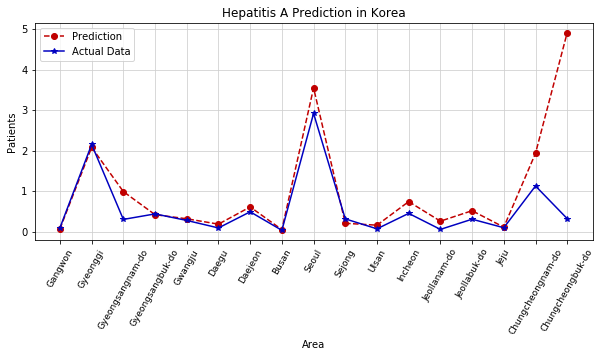

In [5]:
"""지역별 예측/실제치 시각화"""
plt.figure(figsize=(10,4))
plt.title("Hepatitis A Prediction in Korea")
plt.plot(pred_list,color="#C00000",ls='--',marker='o', label="Prediction")
plt.plot(act_list,color="#0000C0",ls='-',marker='*', label="Actual Data")
plt.grid(color="#D0D0D0")
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],labels=area,fontsize=9,rotation=60)
plt.xlabel("Area")
plt.ylabel("Patients")
plt.legend()
plt.show()

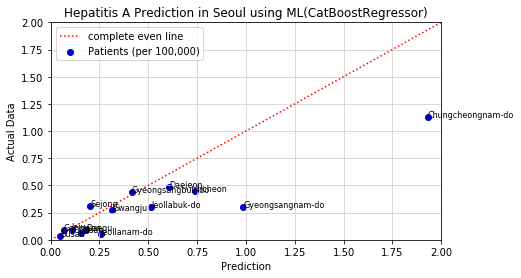

In [6]:
"""Satter를 이용한 실제/예측치 차이 시각화"""
plt.figure(figsize=(7,4))
plt.title("Hepatitis A Prediction in Seoul using ML(CatBoostRegressor)")
plt.scatter(pred_list,act_list,label="Patients (per 100,000)",color="#0000CC")
plt.plot([0,1,2],[0,1,2],color="red",ls=":",label="complete even line")
plt.grid(color="#D0D0D0")
plt.xlabel("Prediction")
plt.ylabel("Actual Data")
for i in range(17):
    if(pred_list[i]<2):
        plt.text(pred_list[i],act_list[i],area[i],fontsize=8)
plt.xlim(0,2)
plt.ylim(0,2)
plt.legend()
plt.show()

# 3. LSTM

In [12]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [8]:
data = pd.read_csv("../data/hepatitisA_data.csv")

In [9]:
pred_list,act_list = [],[]
area=data["Area"].unique()
for area in area:
    seoul = data[data["Area"]==area]
    y = seoul["Patient"]
    del seoul["Area"],seoul["Population"]
    seoul.reset_index(drop=True,inplace=True)

    for i in range(len(seoul["date"])):
        seoul.loc[i,"date"] = str(datetime.time(12,i+1,0))
        seoul["date"] = pd.to_datetime(seoul["date"])

    seoul["y_t+1"] = seoul["Patient"].shift(-1)
    seoul["y_t"] = seoul["Patient"]
    seoul["y_t-1"] = seoul["Patient"].shift(1)
    seoul["y_t-2"] = seoul["Patient"].shift(2)
    seoul["y_t-3"] = seoul["Patient"].shift(3)
    seoul["y_t-4"] = seoul["Patient"].shift(4)
    seoul["y_t-5"] = seoul["Patient"].shift(5)
    del seoul["Patient"]
    seoul.dropna(inplace=True)
    seoul.index = seoul["date"]
    del seoul["date"]
    X = seoul.copy()
    del X["y_t+1"]
    y = seoul["y_t+1"]
    X_tr = X[:-1]
    y_tr = y[:-1]

    X_te = X[-1:]
    y_te = y[-1:]
"""---------------------- 위와 동일 ----------------------------"""
    """딥러닝을 위한 array 방식의 데이터 구성"""
    X_tr = np.array(X_tr)
    y_tr = np.array(y_tr)

    X_te = np.array(X_te)
    y_te = np.array(y_te)
    """LSTM을 위한 3차원 데이터 구성"""
    X_train = X_tr.reshape(X_tr.shape[0], 52, 1)
    X_test = X_te.reshape(X_te.shape[0],52,1)
    
    """LSTM모델링"""
    model = Sequential()
    model.add(LSTM(25, input_shape=(52, 1)))
    model.add(Dense(1))
    model.compile(optimizer='RMSprop', loss='mse')
    earlystop = EarlyStopping(monitor='val_loss', 
                              patience=5)
    
    """history에 저장하여 loss 시각화 도출"""
    history = model.fit(X_train,
                        y_tr,
                        batch_size=2,
                        epochs=100,#50
                        validation_data=(X_test, y_te),
                        callbacks=[earlystop],
                        verbose=1)

    """예측치와 실제치 리스트에 추가"""
    print(area)
    print(mean_squared_error(y_te,model.predict(X_test)[0])**0.5)
    
    pred_list.append(model.predict(X_test)[0])
    act_list.append(y_te[0])

Train on 29 samples, validate on 1 samples
Epoch 1/100
29/29 [==============================] - ETA: 6s - loss: 0.008 - ETA: 1s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.002 - 1s 30ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 2/100
29/29 [==============================] - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.002 - ETA: 0s - loss: 0.002 - ETA: 0s - loss: 0.001 - 0s 11ms/step - loss: 0.0018 - val_loss: 1.6648e-04
Epoch 3/100
29/29 [==============================] - ETA: 0s - loss: 9.8239e-0 - ETA: 0s - loss: 6.8414e-0 - ETA: 0s - loss: 7.2667e-0 - ETA: 0s - loss: 9.5412e-0 - ETA: 0s - loss: 0.0016    - 0s 12ms/step - loss: 0.0016 - val_loss: 2.6846e-04
Epoch 4/100
29/29 [==============================] - ETA: 0s - loss: 0.002 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.002 - ETA: 0s - loss: 0.001 - ETA: 0s - loss: 0.001 - 0s 12ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 5/100
29/29 [==============================

29/29 [==============================] - ETA: 0s - loss: 20.60 - ETA: 0s - loss: 9.3185 - ETA: 0s - loss: 11.20 - ETA: 0s - loss: 8.8174 - ETA: 0s - loss: 8.610 - 0s 10ms/step - loss: 9.0285 - val_loss: 0.9394
Epoch 3/100
29/29 [==============================] - ETA: 0s - loss: 2.779 - ETA: 0s - loss: 10.97 - ETA: 0s - loss: 7.1815 - ETA: 0s - loss: 6.226 - ETA: 0s - loss: 5.323 - 0s 10ms/step - loss: 5.7741 - val_loss: 0.0081
Epoch 4/100
29/29 [==============================] - ETA: 0s - loss: 0.552 - ETA: 0s - loss: 2.409 - ETA: 0s - loss: 2.284 - ETA: 0s - loss: 1.919 - ETA: 0s - loss: 3.461 - 0s 10ms/step - loss: 4.3038 - val_loss: 0.1334
Epoch 5/100
29/29 [==============================] - ETA: 0s - loss: 9.979 - ETA: 0s - loss: 7.038 - ETA: 0s - loss: 5.185 - ETA: 0s - loss: 4.083 - ETA: 0s - loss: 4.034 - 0s 10ms/step - loss: 3.8253 - val_loss: 0.2402
Epoch 6/100
29/29 [==============================] - ETA: 0s - loss: 1.792 - ETA: 0s - loss: 1.580 - ETA: 0s - loss: 1.258 - ETA:

Epoch 2/100
29/29 [==============================] - ETA: 0s - loss: 0.025 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.008 - 0s 12ms/step - loss: 0.0082 - val_loss: 0.0010
Epoch 3/100
29/29 [==============================] - ETA: 0s - loss: 0.027 - ETA: 0s - loss: 0.016 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.008 - 0s 10ms/step - loss: 0.0084 - val_loss: 3.3356e-04
Epoch 4/100
29/29 [==============================] - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - 0s 12ms/step - loss: 0.0085 - val_loss: 6.8170e-04
Epoch 5/100
29/29 [==============================] - ETA: 0s - loss: 3.8804e-0 - ETA: 0s - loss: 0.0112    - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.008 - 0s 12ms/step - loss: 0.0078 - val_loss: 4.0359e-04
Epoch 6/100
29/29 [==============================] -

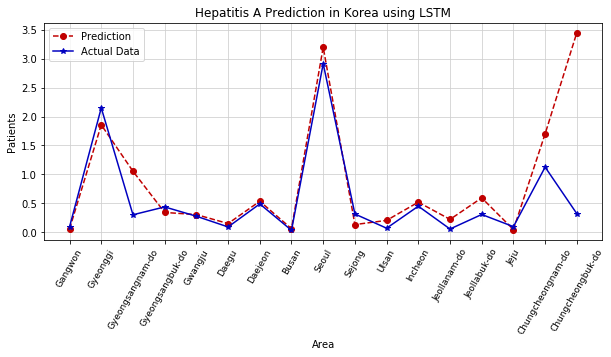

In [10]:
"""LSTM을 활용한 지역별 예측/실제치 시각화"""
area=data["Area"].unique()
plt.figure(figsize=(10,4))
plt.title("Hepatitis A Prediction in Korea using LSTM")
plt.plot(pred_list,color="#C00000",ls='--',marker='o', label="Prediction")
plt.plot(act_list,color="#0000C0",ls='-',marker='*', label="Actual Data")
plt.grid(color="#D0D0D0")
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],labels=area,fontsize=9,rotation=60)
plt.xlabel("Area")
plt.ylabel("Patients")
plt.legend()
plt.show()

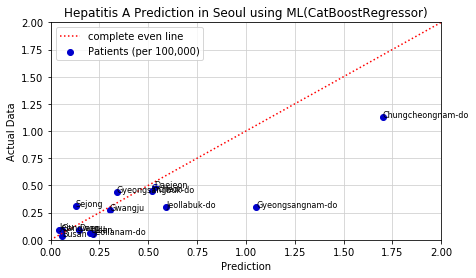

In [11]:
"""Satter를 이용한 실제/예측치 차이 시각화"""
plt.figure(figsize=(7,4))
plt.title("Hepatitis A Prediction in Seoul using ML(CatBoostRegressor)")
plt.scatter(pred_list,act_list,label="Patients (per 100,000)",color="#0000CC")
plt.plot([0,1,2],[0,1,2],color="red",ls=":",label="complete even line")
plt.grid(color="#D0D0D0")
plt.xlabel("Prediction")
plt.ylabel("Actual Data")
for i in range(17):
    if(pred_list[i]<2 and act_list[i]<2):
        plt.text(pred_list[i],act_list[i],area[i],fontsize=8)
plt.xlim(0,2)
plt.ylim(0,2)
plt.legend()
plt.show()

### 충북은 여전히 조개젓( 외부 이슈충격 ) 때문에 예측이 불가능 한 것을 확인할 수 있음.